In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller


In [60]:
data_path = r'C:\Users\ferre\OneDrive\Área de Trabalho\quant\data\BTC_data.csv'

In [61]:
df = pd.read_csv(data_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [62]:
df = df.set_index('timestamp')
df.head(5)

,open,high,low,close,volume
timestamp,,,,,
2017-10-28 00:00:00+00:00,5768.79,5850.02,5630.03,5719.64,1276.754412
2017-10-29 00:00:00+00:00,5709.98,6189.88,5648.01,6169.98,1804.778173
2017-10-30 00:00:00+00:00,6133.01,6248.68,6030.00,6120.50,1473.687043
2017-10-31 00:00:00+00:00,6120.52,6498.01,6100.00,6463.00,1511.774925
2017-11-01 00:00:00+00:00,6463.00,6774.67,6338.02,6753.98,1675.615188


In [63]:
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

In [64]:
df['rv'] = np.log(df.groupby(df.index.date)['log_return'].transform(lambda x: np.sum(x**2)))

c:\Users\ferre\OneDrive\Área de Trabalho\quant\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


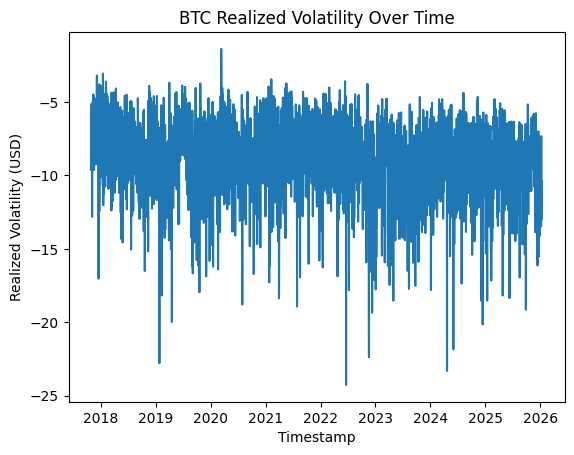

In [65]:
sns.lineplot(data=df, x=df.index, y='rv')
plt.title('BTC Realized Volatility Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Realized Volatility (USD)')
plt.show()